# Jenius - Facebook Prophet
Forecasting for Jenius, digital bank in Indonesia

Forecast 5 models the following KPIs, that they'll use for strategic planning
- Balance
- Approved customers
- Funded customers
- New approved customers: shows the number of the new approved customers for each day. Once a customer downloads the bank's application, they need to get through the KYC ("know your customer") process, which means that a representative of a bank should see the customer at least once
- Balance forecast

Additional data sources:
- non-working days (weekends, national holidays)
- paydays
- dates of campaigns

Deliverables:
- models for the 5 KPIs
- fancy visualizations of the predictions
- raw data in Excel format

In [1]:
import math
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
from matplotlib import pyplot

warnings.filterwarnings("ignore")

random.seed(1)

sns.set(rc={'figure.figsize': (18, 6)})

In [2]:
def reduce_memory_usage(df, verbose=True): 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    start_mem = df.memory_usage().sum() / 1024**2 
    if verbose: print('Starting memory usage: {:5.2f} MB'.format(start_mem))

    for col in df.columns: 
        col_type = df[col].dtypes 
        if col_type in numerics: 
            c_min = df[col].min() 
            c_max = df[col].max() 
            if str(col_type)[:3] == 'int': 
                if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max: 
                    df[col] = df[col].astype(np.int8) 
                elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max: 
                    df[col] = df[col].astype(np.int16) 
                elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max: 
                    df[col] = df[col].astype(np.int32) 
                elif c_min >= np.iinfo(np.int64).min and c_max <= np.iinfo(np.int64).max: 
                    df[col] = df[col].astype(np.int64)   
                else: 
                    if c_min >= np.finfo(np.float16).min and c_max <= np.finfo(np.float16).max: 
                        df[col] = df[col].astype(np.float16) 
                    elif c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max: 
                        df[col] = df[col].astype(np.float32) 
                    else: 
                        df[col] = df[col].astype(np.float64)     
        end_mem = df.memory_usage().sum() / 1024**2 
        if verbose: print('Reduced memory usage: {:5.2f} MB ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem)) 
        return df

## Exploratory Data Analysis

In [12]:
df_input = pd.read_csv('input/input.csv', sep=';', engine='python')
print("{:,} records and {} features in train set.".format(df_input.shape[0], df_input.shape[1]))

df_input = reduce_memory_usage(df_input)

241 records and 2 features in train set.
Starting memory usage:  0.00 MB
Reduced memory usage:  0.00 MB (0.0% reduction)


In [13]:
pd.options.display.float_format = '{:,.0f}'.format
df_input[:3]

,buss_date,balance
0,2018.06.01,"934,075,825,517"
1,2018.06.02,"929,958,070,324"
2,2018.06.03,"925,557,302,415"


## Time series prediction

### Facebook's prophet
[Facebook's prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [14]:
df_fbp = df_input[['buss_date', 'balance']].rename(index=str, columns={"buss_date": "ds", "balance": "y"})

In [15]:
df_fbp[:3]

,ds,y
0,2018.06.01,"934,075,825,517"
1,2018.06.02,"929,958,070,324"
2,2018.06.03,"925,557,302,415"


In [16]:
m = Prophet()
m.fit(df_fbp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
601,2020-01-27
602,2020-01-28
603,2020-01-29
604,2020-01-30
605,2020-01-31


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
601,2020-01-27,"4,584,098,765,725","4,307,910,258,436","4,890,907,384,248"
602,2020-01-28,"4,587,671,087,950","4,301,918,179,307","4,896,343,974,645"
603,2020-01-29,"4,596,693,512,772","4,320,709,254,298","4,901,623,120,590"
604,2020-01-30,"4,603,703,495,874","4,323,196,148,692","4,923,803,073,844"
605,2020-01-31,"4,609,836,857,941","4,320,073,915,005","4,919,222,960,949"


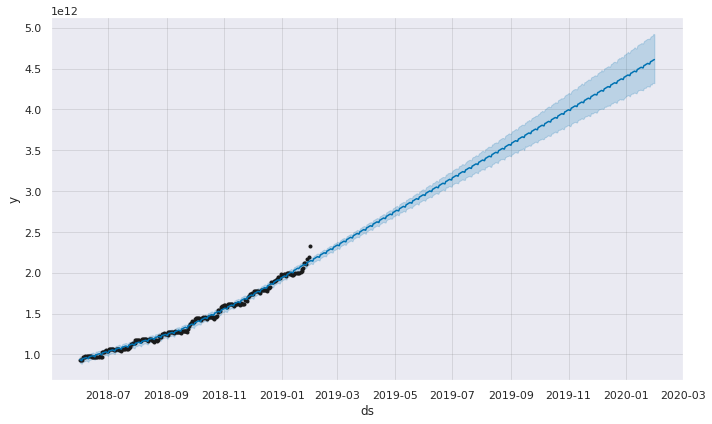

In [19]:
fig1 = m.plot(forecast)

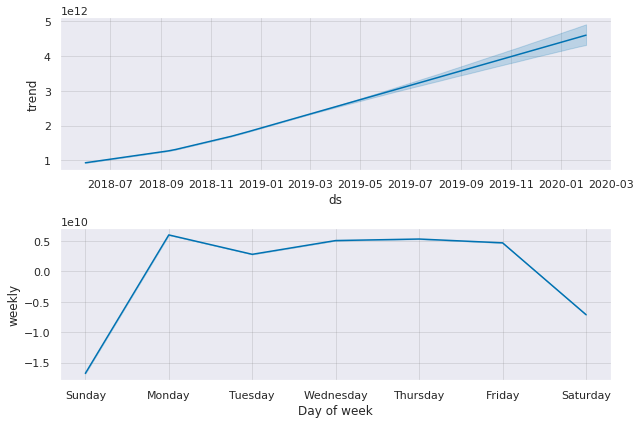

In [20]:
fig2 = m.plot_components(forecast)

In [ ]:
forecast.to_csv('output/fbprophet_forecast.csv')